<a href="https://colab.research.google.com/github/aditya-167/TradingBot/blob/main/Copy_of_CS435.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pickle
import numpy as np
import pandas as pd
from pandas.core.window.expanding import Axis
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
#get particular stock index value
stock_iter = 7
training_object = open("/content/drive/MyDrive/CS435/datasets/training_set.pkl", "rb")
training_df = pickle.load(training_object)
stock_df = training_df[stock_iter] #taking the first table in the array as of now.

In [4]:
stock_df['Close_pct_change'] = stock_df['Close'].pct_change()

In [5]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change
0,0.617992,0.635862,0.615457,0.625434,0.735743,NaN
1,0.624494,0.630280,0.622777,0.624535,0.556619,-0.001438
2,0.624453,0.630055,0.614108,0.614557,0.708483,-0.015976
3,0.615028,0.621264,0.613498,0.619505,0.603601,0.008051
4,0.619710,0.622940,0.616561,0.621754,0.383305,0.003630
...,...,...,...,...,...,...
2197,0.842323,0.848088,0.834103,0.834962,0.240017,-0.007871
2198,0.835657,0.837906,0.827663,0.829646,0.185874,-0.006367
2199,0.830628,0.832182,0.823226,0.824739,0.287914,-0.005915
2200,0.824821,0.824821,0.818217,0.820242,0.399487,-0.005453


In [6]:
stock_df = stock_df.dropna()

In [7]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change
1,0.624494,0.630280,0.622777,0.624535,0.556619,-0.001438
2,0.624453,0.630055,0.614108,0.614557,0.708483,-0.015976
3,0.615028,0.621264,0.613498,0.619505,0.603601,0.008051
4,0.619710,0.622940,0.616561,0.621754,0.383305,0.003630
5,0.622000,0.623508,0.614762,0.618974,0.741115,-0.004472
...,...,...,...,...,...,...
2197,0.842323,0.848088,0.834103,0.834962,0.240017,-0.007871
2198,0.835657,0.837906,0.827663,0.829646,0.185874,-0.006367
2199,0.830628,0.832182,0.823226,0.824739,0.287914,-0.005915
2200,0.824821,0.824821,0.818217,0.820242,0.399487,-0.005453


In [8]:
stock_df['Close_pct_change'].describe()

count    2201.000000
mean        0.000143
std         0.006683
min        -0.088877
25%        -0.002856
50%         0.000171
75%         0.003267
max         0.041424
Name: Close_pct_change, dtype: float64

### Close percentage change categories

In [9]:
bin_labels = ["decrease", "no big change", "increase"]
stock_df['Close_pct_change_range'] = pd.qcut(stock_df['Close_pct_change'], q=3)
stock_df['Close_pct_change_category'] = pd.qcut(stock_df['Close_pct_change'], q=3,labels=bin_labels)
stock_df

<ipython-input-9-8fc8cac91a6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Close_pct_change_range'] = pd.qcut(stock_df['Close_pct_change'], q=3)
<ipython-input-9-8fc8cac91a6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Close_pct_change_category'] = pd.qcut(stock_df['Close_pct_change'], q=3,labels=bin_labels)


,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_range,Close_pct_change_category
1,0.624494,0.630280,0.622777,0.624535,0.556619,-0.001438,"(-0.00178, 0.00214]",no big change
2,0.624453,0.630055,0.614108,0.614557,0.708483,-0.015976,"(-0.08990000000000001, -0.00178]",decrease
3,0.615028,0.621264,0.613498,0.619505,0.603601,0.008051,"(0.00214, 0.0414]",increase
4,0.619710,0.622940,0.616561,0.621754,0.383305,0.003630,"(0.00214, 0.0414]",increase
5,0.622000,0.623508,0.614762,0.618974,0.741115,-0.004472,"(-0.08990000000000001, -0.00178]",decrease
...,...,...,...,...,...,...,...,...
2197,0.842323,0.848088,0.834103,0.834962,0.240017,-0.007871,"(-0.08990000000000001, -0.00178]",decrease
2198,0.835657,0.837906,0.827663,0.829646,0.185874,-0.006367,"(-0.08990000000000001, -0.00178]",decrease
2199,0.830628,0.832182,0.823226,0.824739,0.287914,-0.005915,"(-0.08990000000000001, -0.00178]",decrease
2200,0.824821,0.824821,0.818217,0.820242,0.399487,-0.005453,"(-0.08990000000000001, -0.00178]",decrease


### Range of the each close percentage categories

In [10]:
print("Ranges for the categories \n"+str(stock_df['Close_pct_change_range'].value_counts().keys()[0])+"\n"+
str(stock_df['Close_pct_change_range'].value_counts().keys()[1])+"\n"+
str(stock_df['Close_pct_change_range'].value_counts().keys()[2]))

Ranges for the categories 
(-0.08990000000000001, -0.00178]
(0.00214, 0.0414]
(-0.00178, 0.00214]


In [11]:
def addTI(df,lag=5):
  short_w = [5,8,13,26,44,50,75,100,150]
  long_w = [12,19,26,44,75,100,125,200,300]
  data = df.copy()
  features = []
  for x,y in zip(short_w,long_w):
    data["SMA_diff_"+str(x)+"_"+str(y)] = data.Close.rolling(x).mean() - data.Close.rolling(y).mean()
    features.append("SMA_diff_"+str(x)+"_"+str(y))
  for x in (short_w+long_w):
    data["Boll_"+str(x)] = (data.Close - data.Close.rolling(x).mean())/data.Close.rolling(x).std() 
    features.append("Boll_"+str(x))
    data["Min_"+str(x)] = data.Close.rolling(x).min()/data.Close -1 
    features.append("Min_"+str(x))
    data["Max_"+str(x)] =  data.Close.rolling(x).max()/data.Close -1  
    features.append("Max_"+str(x))
    data["Mom_"+str(x)] = data.Close_pct_change.rolling(x).mean()
    features.append("Mom_"+str(x))
    data["Vol_"+str(x)] = data.Close_pct_change.rolling(x).std()
    features.append("Vol_"+str(x))
  
  for f in features:
    col = "{}_lag_{}".format(f,lag)
    data[col] = data[f].shift(lag)

  data.dropna(inplace=True)
  return data

In [12]:
stock_df = addTI(stock_df,lag=21)

<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

<Axes: title={'center': 'Feature Plot'}>

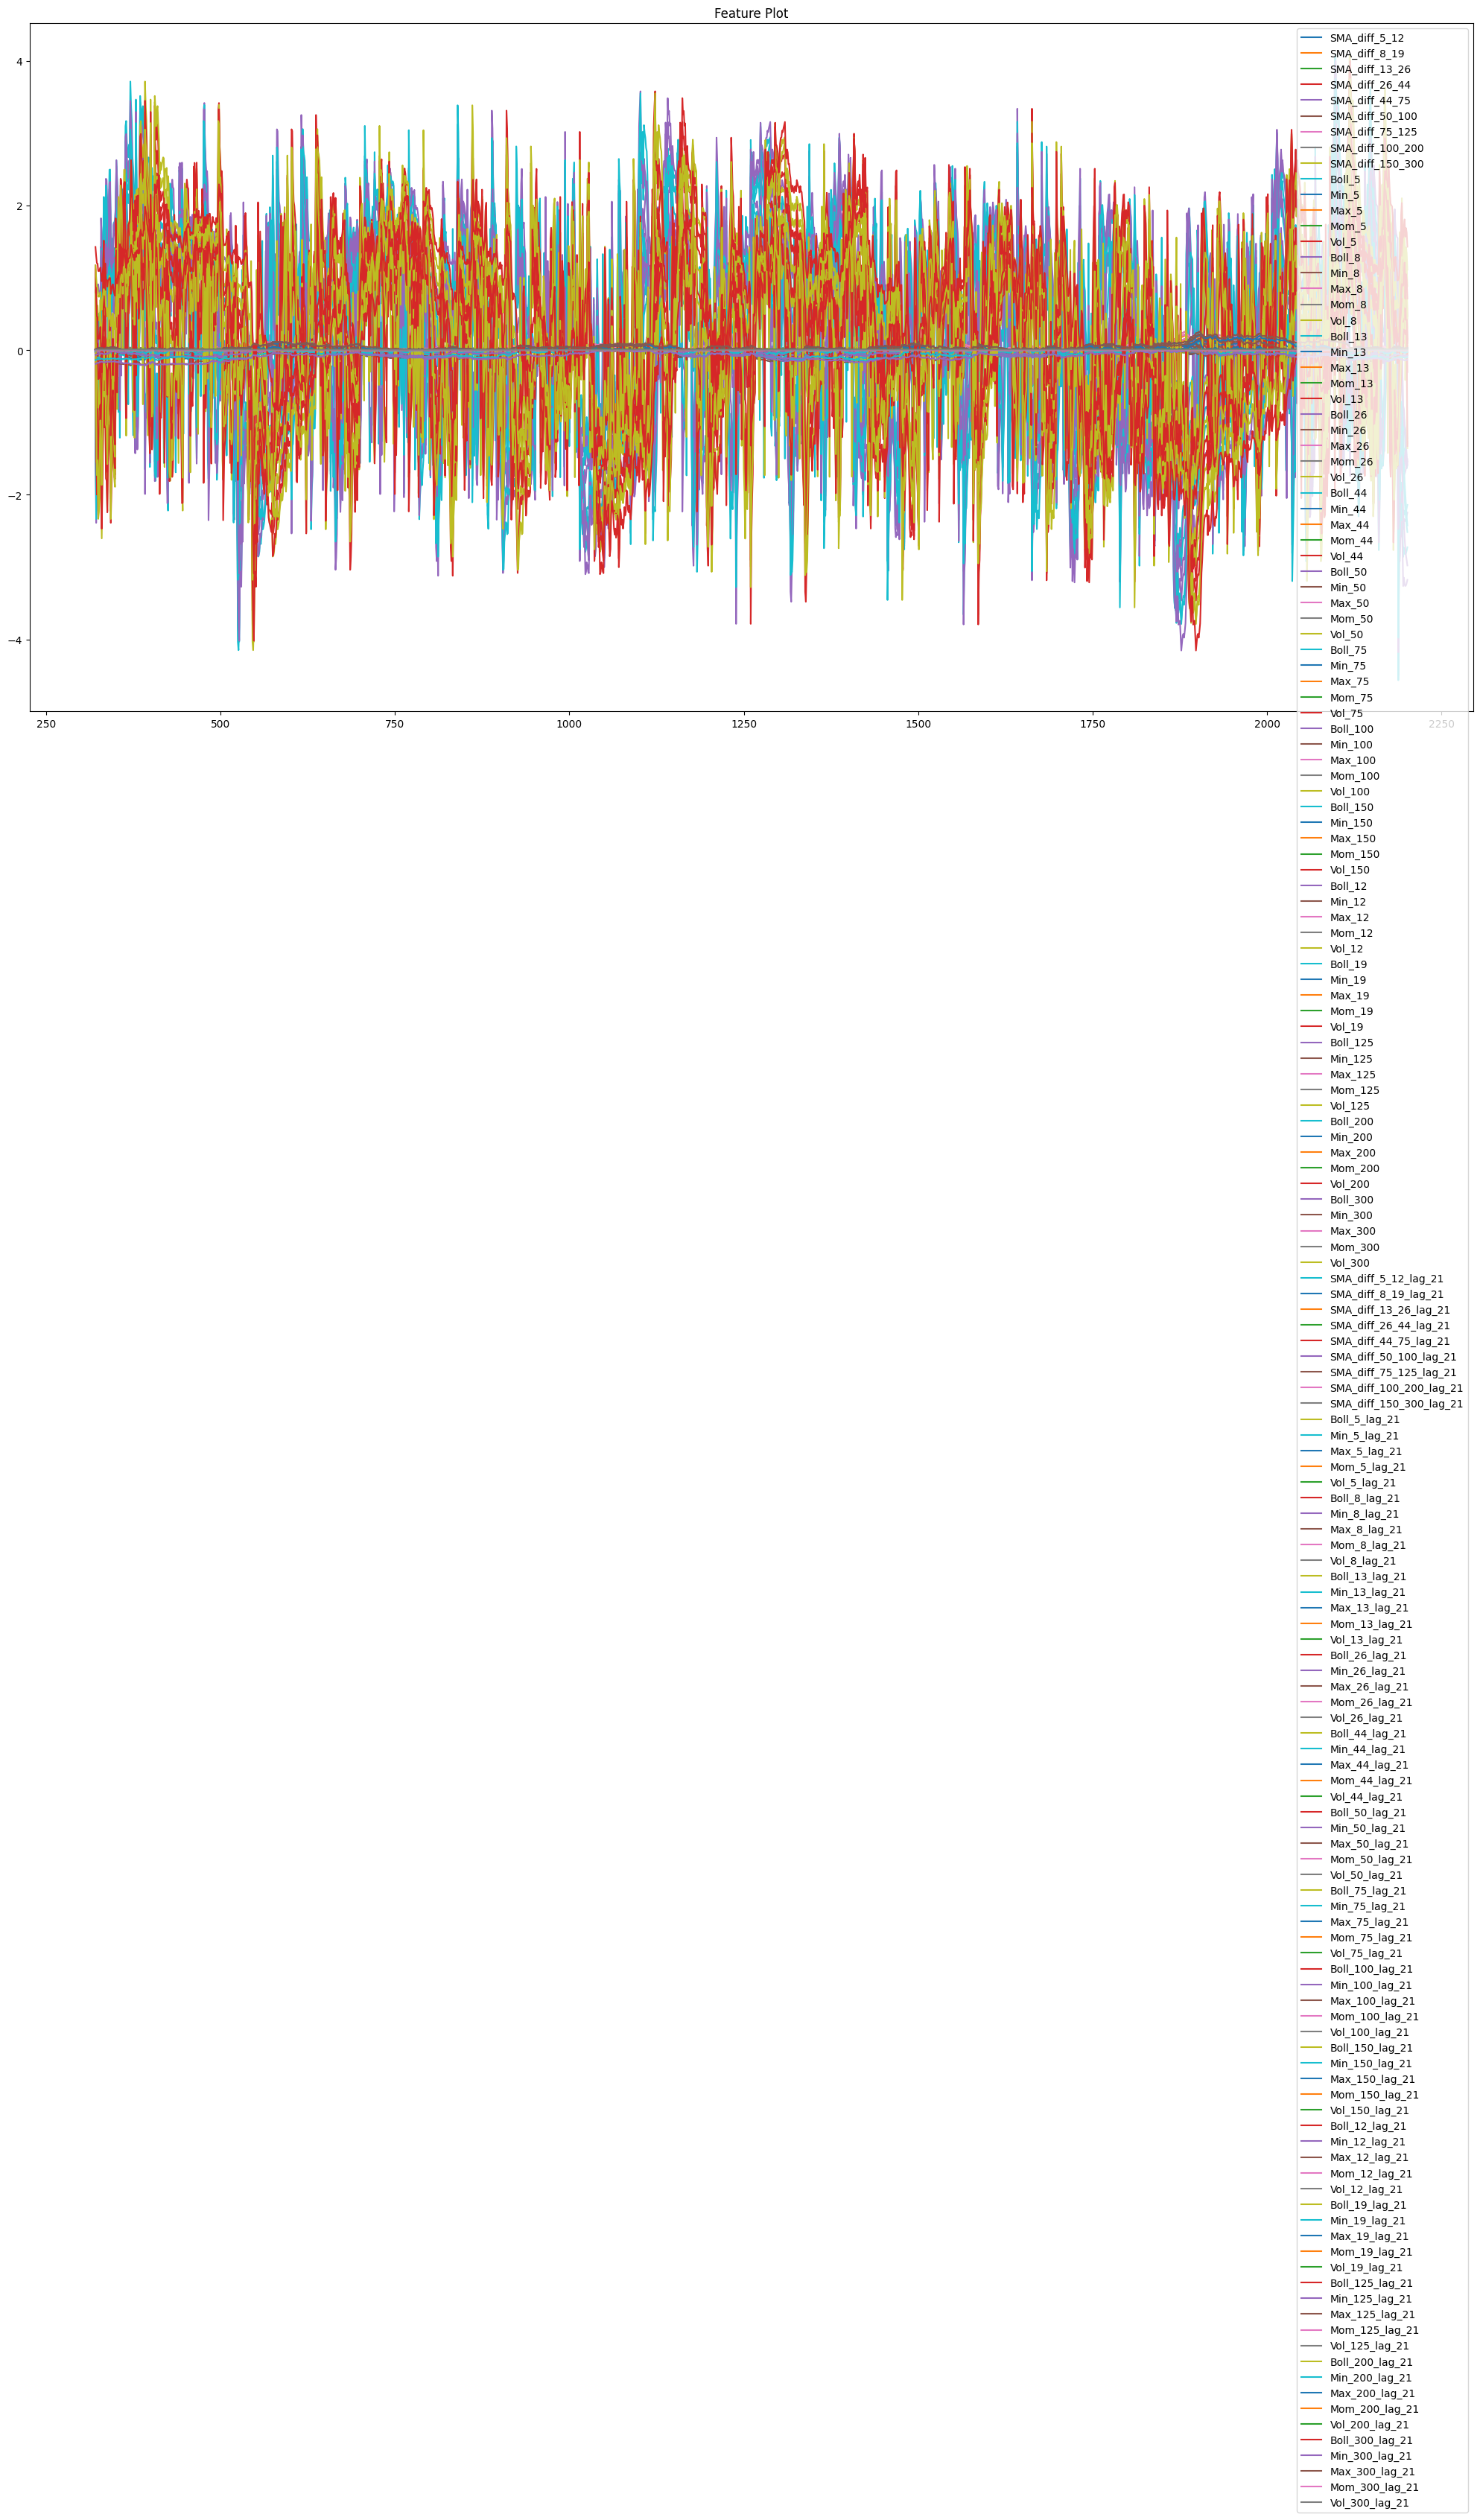

In [13]:
stock_df[stock_df.columns[8:]].plot(title='Feature Plot', figsize=(25, 12))

# Task 3 :Trading Predictive Models

In [14]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_range,Close_pct_change_category,SMA_diff_5_12,SMA_diff_8_19,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.746678,0.747291,0.744837,0.746759,0.246460,0.000493,"(-0.00178, 0.00214]",no big change,-0.002066,-0.001224,...,1.172344,-0.137731,0.008501,0.000505,0.006241,1.428677,-0.191424,0.008501,0.000670,0.006409
322,0.744224,0.748518,0.734410,0.737457,0.266163,-0.012458,"(-0.08990000000000001, -0.00178]",decrease,-0.001979,-0.002303,...,1.010982,-0.131681,0.015576,0.000474,0.006263,1.303857,-0.185751,0.015576,0.000652,0.006423
323,0.737886,0.742997,0.737068,0.740339,0.141317,0.003909,"(0.00214, 0.0414]",increase,-0.002014,-0.002543,...,0.882485,-0.126832,0.021248,0.000455,0.006275,1.204817,-0.177554,0.021248,0.000687,0.006360
324,0.739481,0.745410,0.739481,0.742772,0.160560,0.003286,"(0.00214, 0.0414]",increase,-0.001732,-0.002518,...,0.872442,-0.126784,0.021303,0.000477,0.006266,1.197173,-0.177509,0.021303,0.000660,0.006346
325,0.742997,0.746019,0.742834,0.743897,0.139101,0.001514,"(-0.00178, 0.00214]",no big change,-0.001758,-0.001913,...,0.743118,-0.121808,0.027123,0.000443,0.006280,1.096362,-0.172822,0.027123,0.000629,0.006354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.842323,0.848088,0.834103,0.834962,0.240017,-0.007871,"(-0.08990000000000001, -0.00178]",decrease,-0.015462,-0.031715,...,1.563907,-0.107885,0.016662,0.000523,0.006822,1.810082,-0.141695,0.016662,0.000440,0.007417
2198,0.835657,0.837906,0.827663,0.829646,0.185874,-0.006367,"(-0.08990000000000001, -0.00178]",decrease,-0.014982,-0.030525,...,1.280796,-0.100250,0.025363,0.000496,0.006847,1.568759,-0.134350,0.025363,0.000458,0.007389
2199,0.830628,0.832182,0.823226,0.824739,0.287914,-0.005915,"(-0.08990000000000001, -0.00178]",decrease,-0.013367,-0.030680,...,1.420088,-0.104600,0.020405,0.000459,0.006803,1.689297,-0.138535,0.020405,0.000478,0.007393
2200,0.824821,0.824821,0.818217,0.820242,0.399487,-0.005453,"(-0.08990000000000001, -0.00178]",decrease,-0.016393,-0.030849,...,1.344177,-0.102869,0.022378,0.000423,0.006797,1.626753,-0.136870,0.022378,0.000474,0.007394


In [15]:
stock_df.dropna(inplace=True) 

In [16]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_range,Close_pct_change_category,SMA_diff_5_12,SMA_diff_8_19,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.746678,0.747291,0.744837,0.746759,0.246460,0.000493,"(-0.00178, 0.00214]",no big change,-0.002066,-0.001224,...,1.172344,-0.137731,0.008501,0.000505,0.006241,1.428677,-0.191424,0.008501,0.000670,0.006409
322,0.744224,0.748518,0.734410,0.737457,0.266163,-0.012458,"(-0.08990000000000001, -0.00178]",decrease,-0.001979,-0.002303,...,1.010982,-0.131681,0.015576,0.000474,0.006263,1.303857,-0.185751,0.015576,0.000652,0.006423
323,0.737886,0.742997,0.737068,0.740339,0.141317,0.003909,"(0.00214, 0.0414]",increase,-0.002014,-0.002543,...,0.882485,-0.126832,0.021248,0.000455,0.006275,1.204817,-0.177554,0.021248,0.000687,0.006360
324,0.739481,0.745410,0.739481,0.742772,0.160560,0.003286,"(0.00214, 0.0414]",increase,-0.001732,-0.002518,...,0.872442,-0.126784,0.021303,0.000477,0.006266,1.197173,-0.177509,0.021303,0.000660,0.006346
325,0.742997,0.746019,0.742834,0.743897,0.139101,0.001514,"(-0.00178, 0.00214]",no big change,-0.001758,-0.001913,...,0.743118,-0.121808,0.027123,0.000443,0.006280,1.096362,-0.172822,0.027123,0.000629,0.006354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.842323,0.848088,0.834103,0.834962,0.240017,-0.007871,"(-0.08990000000000001, -0.00178]",decrease,-0.015462,-0.031715,...,1.563907,-0.107885,0.016662,0.000523,0.006822,1.810082,-0.141695,0.016662,0.000440,0.007417
2198,0.835657,0.837906,0.827663,0.829646,0.185874,-0.006367,"(-0.08990000000000001, -0.00178]",decrease,-0.014982,-0.030525,...,1.280796,-0.100250,0.025363,0.000496,0.006847,1.568759,-0.134350,0.025363,0.000458,0.007389
2199,0.830628,0.832182,0.823226,0.824739,0.287914,-0.005915,"(-0.08990000000000001, -0.00178]",decrease,-0.013367,-0.030680,...,1.420088,-0.104600,0.020405,0.000459,0.006803,1.689297,-0.138535,0.020405,0.000478,0.007393
2200,0.824821,0.824821,0.818217,0.820242,0.399487,-0.005453,"(-0.08990000000000001, -0.00178]",decrease,-0.016393,-0.030849,...,1.344177,-0.102869,0.022378,0.000423,0.006797,1.626753,-0.136870,0.022378,0.000474,0.007394


In [17]:
stock_df.Close_pct_change_category = stock_df.Close_pct_change_category.apply(lambda x:1 if(x== "increase")else 0)

In [18]:
stock_df.drop(columns="Close_pct_change_range",inplace = True)  # droping the  close_pct_change_Range colums as we dont need this need more to calcautet the big increase, decrease

In [19]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_category,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.746678,0.747291,0.744837,0.746759,0.246460,0.000493,0,-0.002066,-0.001224,-0.003543,...,1.172344,-0.137731,0.008501,0.000505,0.006241,1.428677,-0.191424,0.008501,0.000670,0.006409
322,0.744224,0.748518,0.734410,0.737457,0.266163,-0.012458,0,-0.001979,-0.002303,-0.002900,...,1.010982,-0.131681,0.015576,0.000474,0.006263,1.303857,-0.185751,0.015576,0.000652,0.006423
323,0.737886,0.742997,0.737068,0.740339,0.141317,0.003909,1,-0.002014,-0.002543,-0.002459,...,0.882485,-0.126832,0.021248,0.000455,0.006275,1.204817,-0.177554,0.021248,0.000687,0.006360
324,0.739481,0.745410,0.739481,0.742772,0.160560,0.003286,1,-0.001732,-0.002518,-0.002381,...,0.872442,-0.126784,0.021303,0.000477,0.006266,1.197173,-0.177509,0.021303,0.000660,0.006346
325,0.742997,0.746019,0.742834,0.743897,0.139101,0.001514,0,-0.001758,-0.001913,-0.002359,...,0.743118,-0.121808,0.027123,0.000443,0.006280,1.096362,-0.172822,0.027123,0.000629,0.006354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.842323,0.848088,0.834103,0.834962,0.240017,-0.007871,0,-0.015462,-0.031715,-0.025960,...,1.563907,-0.107885,0.016662,0.000523,0.006822,1.810082,-0.141695,0.016662,0.000440,0.007417
2198,0.835657,0.837906,0.827663,0.829646,0.185874,-0.006367,0,-0.014982,-0.030525,-0.029696,...,1.280796,-0.100250,0.025363,0.000496,0.006847,1.568759,-0.134350,0.025363,0.000458,0.007389
2199,0.830628,0.832182,0.823226,0.824739,0.287914,-0.005915,0,-0.013367,-0.030680,-0.033541,...,1.420088,-0.104600,0.020405,0.000459,0.006803,1.689297,-0.138535,0.020405,0.000478,0.007393
2200,0.824821,0.824821,0.818217,0.820242,0.399487,-0.005453,0,-0.016393,-0.030849,-0.037552,...,1.344177,-0.102869,0.022378,0.000423,0.006797,1.626753,-0.136870,0.022378,0.000474,0.007394


In [20]:
Y = stock_df.Close_pct_change_category.to_frame() # Y is labes for big change or small changes

In [21]:
stock_df.drop(columns="Close_pct_change_category",inplace = True)


In [22]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.746678,0.747291,0.744837,0.746759,0.246460,0.000493,-0.002066,-0.001224,-0.003543,-0.002680,...,1.172344,-0.137731,0.008501,0.000505,0.006241,1.428677,-0.191424,0.008501,0.000670,0.006409
322,0.744224,0.748518,0.734410,0.737457,0.266163,-0.012458,-0.001979,-0.002303,-0.002900,-0.003168,...,1.010982,-0.131681,0.015576,0.000474,0.006263,1.303857,-0.185751,0.015576,0.000652,0.006423
323,0.737886,0.742997,0.737068,0.740339,0.141317,0.003909,-0.002014,-0.002543,-0.002459,-0.003649,...,0.882485,-0.126832,0.021248,0.000455,0.006275,1.204817,-0.177554,0.021248,0.000687,0.006360
324,0.739481,0.745410,0.739481,0.742772,0.160560,0.003286,-0.001732,-0.002518,-0.002381,-0.003781,...,0.872442,-0.126784,0.021303,0.000477,0.006266,1.197173,-0.177509,0.021303,0.000660,0.006346
325,0.742997,0.746019,0.742834,0.743897,0.139101,0.001514,-0.001758,-0.001913,-0.002359,-0.004212,...,0.743118,-0.121808,0.027123,0.000443,0.006280,1.096362,-0.172822,0.027123,0.000629,0.006354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.842323,0.848088,0.834103,0.834962,0.240017,-0.007871,-0.015462,-0.031715,-0.025960,-0.006488,...,1.563907,-0.107885,0.016662,0.000523,0.006822,1.810082,-0.141695,0.016662,0.000440,0.007417
2198,0.835657,0.837906,0.827663,0.829646,0.185874,-0.006367,-0.014982,-0.030525,-0.029696,-0.007363,...,1.280796,-0.100250,0.025363,0.000496,0.006847,1.568759,-0.134350,0.025363,0.000458,0.007389
2199,0.830628,0.832182,0.823226,0.824739,0.287914,-0.005915,-0.013367,-0.030680,-0.033541,-0.008441,...,1.420088,-0.104600,0.020405,0.000459,0.006803,1.689297,-0.138535,0.020405,0.000478,0.007393
2200,0.824821,0.824821,0.818217,0.820242,0.399487,-0.005453,-0.016393,-0.030849,-0.037552,-0.009693,...,1.344177,-0.102869,0.022378,0.000423,0.006797,1.626753,-0.136870,0.022378,0.000474,0.007394


In [23]:
X= stock_df.copy() # X = are features  from all the indicator  

In [24]:
X.describe()

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
count,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,...,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000
mean,0.875009,0.878450,0.871585,0.874986,0.272343,0.000070,0.000174,0.000318,0.000449,0.000713,...,0.333862,-0.068003,0.047401,0.000129,0.006269,0.388796,-0.088311,0.054297,0.000138,0.006250
std,0.059162,0.059476,0.058848,0.059171,0.189394,0.006742,0.006446,0.008003,0.007770,0.007420,...,1.359010,0.038964,0.044109,0.000356,0.001200,1.321498,0.048969,0.050566,0.000291,0.001119
min,0.737886,0.739930,0.734410,0.737457,0.000000,-0.088877,-0.038264,-0.037537,-0.037552,-0.030288,...,-3.737160,-0.154522,0.000000,-0.001044,0.004287,-4.154544,-0.213152,0.000000,-0.000620,0.004502
25%,0.830301,0.834063,0.827193,0.830587,0.151904,-0.002814,-0.003137,-0.003966,-0.003530,-0.004011,...,-0.725270,-0.098850,0.016436,-0.000098,0.005163,-0.390949,-0.120823,0.019363,-0.000020,0.005165
50%,0.861480,0.865181,0.858720,0.861337,0.216591,0.000170,0.000261,0.000530,0.000896,0.000968,...,0.592676,-0.070236,0.035703,0.000142,0.006114,0.663150,-0.082794,0.039897,0.000132,0.006160
75%,0.928890,0.933633,0.924801,0.928440,0.326780,0.003157,0.004320,0.005637,0.005760,0.005913,...,1.348882,-0.035450,0.063980,0.000428,0.007240,1.399474,-0.053950,0.074501,0.000341,0.007272
max,0.996810,1.000000,0.991985,0.996892,2.000000,0.041424,0.024366,0.027445,0.023038,0.019149,...,3.752775,0.000000,0.254428,0.000868,0.008914,3.157520,0.000000,0.255355,0.000809,0.008295


In [25]:
X.shape # this will say you how many features we have 

(1881, 164)

In [26]:
Y.shape   # Y is all  big increase , incease and no increase


(1881, 1)

In [27]:

# Get the percentage to split the data( 70% data for training set, and 30% data for test set)

percentage_split =0.7;
row= int(stock_df.shape[0]*percentage_split)

#create the train data set
X_train = X[:row]

Y_train = Y[:row]

#create the test data set 
X_test = X[row:]
Y_test = Y[row:]



### **Testing code to check the X and Y**

Testing code for X and Y -- End

**First Data Model Predication -SVC(scalar vector classification) - MODEL-1**

In [28]:
# #Hyperparameter tuning for SVM
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.model_selection import ParameterSampler, train_test_split

In [29]:
# param_grid = {'C': np.logspace(-3, 3, 7), 'kernel': ['linear', 'rbf'], 'gamma': np.logspace(-3, 3, 7)}

# # Generate 100 different parameter combinations
# param_sampler = ParameterSampler(param_grid, n_iter=100, random_state=42)
# param_combos = list(param_sampler)

# # Loop through the parameter combinations and train SVM models
# for i, params in enumerate(param_combos):
#     svm = SVC(**params)
#     svm.fit(X_train, Y_train)
#     accuracy = svm.score(X_test, Y_test)
#     print("Parameter Combo", i + 1)
#     print("Parameters:", params)
#     print("Test Set Accuracy:", accuracy)
#     print("------------")

# #77% : 'kernel': 'linear', 'gamma': 1000.0, 'C': 1000.0

In [30]:
# imported the libary for the machine learning model which is  support Vector Classifier (SVC)

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

params = {'C': [500, 1000, 2000,1000], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': [500, 1000, 2000,1000]}

# Now creating model
model = SVC()
grid_search = GridSearchCV(model, params, cv=5)

model.fit(X_train,Y_train)  #training the model on X_train and Y_Train


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [31]:
#X_train.describe().iloc[1,:].plot()

In [32]:
model.score(X_train,Y_train) # checking the score the model on train data set

0.8115501519756839

In [33]:
model.score(X_test,Y_test)# checking the score the model on test data set

0.7823008849557522

In [34]:
#stock_df['Prediction_SVC']

In [35]:
X_test

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
1637,0.975894,0.979350,0.972276,0.976119,0.188956,0.000545,0.000710,-0.002339,-0.001133,0.000518,...,1.110095,-0.081640,0.019274,0.000086,0.007376,1.098903,-0.081640,0.022556,0.000136,0.007031
1638,0.976528,0.977510,0.972684,0.975935,0.170533,-0.000189,0.002789,-0.000954,-0.000854,-0.000320,...,1.278803,-0.084798,0.015769,0.000125,0.007373,1.258317,-0.084798,0.019040,0.000199,0.006976
1639,0.975506,0.975506,0.970558,0.971662,0.162423,-0.004379,0.004271,0.000364,-0.001058,-0.001065,...,1.239790,-0.084298,0.016323,0.000143,0.007367,1.225090,-0.084298,0.019595,0.000236,0.006941
1640,0.971703,0.973421,0.970027,0.972472,0.245100,0.000834,0.004609,0.000651,-0.001565,-0.001446,...,1.187865,-0.083568,0.017134,0.000157,0.007362,1.180633,-0.083568,0.020409,0.000248,0.006936
1641,0.972398,0.972500,0.967328,0.969863,0.475350,-0.002683,0.002912,0.000847,-0.002190,-0.001678,...,1.045826,-0.081176,0.019789,0.000135,0.007364,1.048187,-0.081176,0.023073,0.000247,0.006937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.842323,0.848088,0.834103,0.834962,0.240017,-0.007871,-0.015462,-0.031715,-0.025960,-0.006488,...,1.563907,-0.107885,0.016662,0.000523,0.006822,1.810082,-0.141695,0.016662,0.000440,0.007417
2198,0.835657,0.837906,0.827663,0.829646,0.185874,-0.006367,-0.014982,-0.030525,-0.029696,-0.007363,...,1.280796,-0.100250,0.025363,0.000496,0.006847,1.568759,-0.134350,0.025363,0.000458,0.007389
2199,0.830628,0.832182,0.823226,0.824739,0.287914,-0.005915,-0.013367,-0.030680,-0.033541,-0.008441,...,1.420088,-0.104600,0.020405,0.000459,0.006803,1.689297,-0.138535,0.020405,0.000478,0.007393
2200,0.824821,0.824821,0.818217,0.820242,0.399487,-0.005453,-0.016393,-0.030849,-0.037552,-0.009693,...,1.344177,-0.102869,0.022378,0.000423,0.006797,1.626753,-0.136870,0.022378,0.000474,0.007394


In [36]:
#Now we make and show the models predictins

#showing the prediction
def predictDF(df, model, name):
  data = pd.DataFrame()
  data[name] = model.predict(df)
  return data
  


In [37]:
svc_pred = predictDF(X_test, model, "Prediction_SVC")

In [38]:
svc_pred

,Prediction_SVC
0,0
1,0
2,0
3,0
4,0
...,...
560,0
561,0
562,0
563,0


In [39]:
X_test

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
1637,0.975894,0.979350,0.972276,0.976119,0.188956,0.000545,0.000710,-0.002339,-0.001133,0.000518,...,1.110095,-0.081640,0.019274,0.000086,0.007376,1.098903,-0.081640,0.022556,0.000136,0.007031
1638,0.976528,0.977510,0.972684,0.975935,0.170533,-0.000189,0.002789,-0.000954,-0.000854,-0.000320,...,1.278803,-0.084798,0.015769,0.000125,0.007373,1.258317,-0.084798,0.019040,0.000199,0.006976
1639,0.975506,0.975506,0.970558,0.971662,0.162423,-0.004379,0.004271,0.000364,-0.001058,-0.001065,...,1.239790,-0.084298,0.016323,0.000143,0.007367,1.225090,-0.084298,0.019595,0.000236,0.006941
1640,0.971703,0.973421,0.970027,0.972472,0.245100,0.000834,0.004609,0.000651,-0.001565,-0.001446,...,1.187865,-0.083568,0.017134,0.000157,0.007362,1.180633,-0.083568,0.020409,0.000248,0.006936
1641,0.972398,0.972500,0.967328,0.969863,0.475350,-0.002683,0.002912,0.000847,-0.002190,-0.001678,...,1.045826,-0.081176,0.019789,0.000135,0.007364,1.048187,-0.081176,0.023073,0.000247,0.006937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.842323,0.848088,0.834103,0.834962,0.240017,-0.007871,-0.015462,-0.031715,-0.025960,-0.006488,...,1.563907,-0.107885,0.016662,0.000523,0.006822,1.810082,-0.141695,0.016662,0.000440,0.007417
2198,0.835657,0.837906,0.827663,0.829646,0.185874,-0.006367,-0.014982,-0.030525,-0.029696,-0.007363,...,1.280796,-0.100250,0.025363,0.000496,0.006847,1.568759,-0.134350,0.025363,0.000458,0.007389
2199,0.830628,0.832182,0.823226,0.824739,0.287914,-0.005915,-0.013367,-0.030680,-0.033541,-0.008441,...,1.420088,-0.104600,0.020405,0.000459,0.006803,1.689297,-0.138535,0.020405,0.000478,0.007393
2200,0.824821,0.824821,0.818217,0.820242,0.399487,-0.005453,-0.016393,-0.030849,-0.037552,-0.009693,...,1.344177,-0.102869,0.022378,0.000423,0.006797,1.626753,-0.136870,0.022378,0.000474,0.007394


In [40]:
def graphReturns(df, data, name):
  from pandas.io.formats.style import plt
  from ast import Return
  stock_df = df.copy()
  dat = data.copy()
  stock_df = pd.concat([stock_df,dat],axis=1,ignore_index=True,sort=False)
  print(stock_df)
  stock_df['Return'] =stock_df['Close'].pct_change(1)
  stock_df['Strat_Return'] = stock_df[name].shift(1)*stock_df['Return']
  stock_df['Strat_Return']  # this will shows the stratergy returns from SVC

  # calculate the cumlative returns
  stock_df['Cummulative_Return'] = stock_df['Return'].cumsum()
  # strategy cummlative return
  stock_df['Cummulative_Strat'] = stock_df['Strat_Return'].cumsum()
  stock_df['Cummulative_Strat']

  # Grpah to check our first stratergy
  plt.figure(figsize=(16,8))
  plt.title('Returns')
  plt.plot(stock_df['Cummulative_Return'],color = 'orange',label = 'Stock return')
  plt.plot(stock_df['Cummulative_Strat'],color = 'Red',label = 'Stratergy return')
  plt.xticks(rotation =45)
  plt.legend()
  plt.show()


In [41]:
#graphReturns(X_test, svc_pred,"Prediction_SVC")

**Second Data Model Predication -(Random Forest_Regression )  MODEL-2**

In [42]:
#creating a second model 
from sklearn.ensemble import RandomForestClassifier
model_RFR = RandomForestClassifier()
model_RFR.fit(X_train,Y_train)





<ipython-input-42-d9aa80432684>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(X_train,Y_train)


RandomForestClassifier()

In [43]:
model_RFR.score(X_train,Y_train) # Random

1.0

In [44]:
model_RFR.score(X_test,Y_test)

0.9982300884955753

In [45]:
#Now we make and show the models predictins
#stock_df['Prediction_RFR'] = model.predict(X)
rfr_pred = predictDF(X_test, model_RFR, "Prediction_RFR")

In [46]:
rfr_pred.sum()

Prediction_RFR    195
dtype: int64

In [47]:
#sum(stock_df['Prediction_RFR'])

### **Third Model -- Logistic Regression MODEL- 3**


In [48]:
#creating a second model 
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
model_LR.score(X_train,Y_train) # logisticRegresssion  on train data


0.7948328267477204

In [50]:
model_LR.score(X_test,Y_test) # logistic Regression on test data

0.8106194690265487

In [51]:
lr_pred = predictDF(X_test, model_LR, "Prediction_LR")

In [52]:
sum(lr_pred['Prediction_LR'])

159

### **Forth model for predcition which is DescionTreeRegressor MODEL-4**

In [53]:
#creating the froth model for prediction
from sklearn.tree import DecisionTreeClassifier
model_DTR = DecisionTreeClassifier()
model_DTR.fit(X_train,Y_train)



DecisionTreeClassifier()

In [54]:
model_DTR.score(X_train,Y_train) # logisticRegresssion  on train data

1.0

In [55]:
model_DTR.score(X_test,Y_test) # logisticRegresssion  on train data

1.0

In [56]:
dtr_pred = predictDF(X_test, model_DTR, "Prediction_DTR")

In [57]:
sum(dtr_pred['Prediction_DTR'])

196

### **fith model for Prediction which is DNN MODEL-5**

In [58]:
from pandas.core.algorithms import mode
#creating the fifth model for prediction

from sklearn.neural_network import MLPClassifier
model_DNN = MLPClassifier()
model_DNN= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

model_DNN.fit(X_train,Y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [59]:
model_DNN.score(X_train,Y_train)#DNN ON Train data


0.8237082066869301

In [60]:
model_DNN.score(X_test,Y_test) # DNN on the test data

0.784070796460177

In [61]:
dnn_pred = predictDF(X_test, model_DNN, "Prediction_DNN")
sum(dnn_pred['Prediction_DNN'])

90

### **SIX model for predicition  K-NNN  MODEL-6**


In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [63]:
knn.score(X_train,Y_train)

0.7887537993920972

In [64]:
knn.score(X_test,Y_test)

0.6973451327433628

In [65]:
knn_pred = predictDF(X_test, knn, "Prediction_KNN")
sum(knn_pred['Prediction_KNN'])

93

### **Seventh Modelf ro predicition GaussianNB MODEL-7**


In [66]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

# Generate sample data for demonstration purposes
# Create a Gaussian Naive Bayes classifier object
classifier = GaussianNB()

# Fit the classifier to the sample data
classifier.fit(X_train, Y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [67]:
classifier.score(X_train,Y_train)

0.6595744680851063

In [68]:
classifier.score(X_test,Y_test)

0.6831858407079646

In [69]:
class_pred = predictDF(X_test, classifier, "Prediction_Classifier")
sum(class_pred['Prediction_Classifier'])

253

### **Eight Model for predicition XGBOOST MODEL-8**

In [70]:
import numpy as np
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Generate sample data for demonstration purposes
# Split the data into training and test sets


# Create an XGBoost classifier object
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, Y_train)

# Fit the classifier to the train

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [71]:
classifier_XGB.score(X_train,Y_train)

1.0

In [72]:
classifier_XGB.score(X_test,Y_test)

1.0

In [73]:
XGB_pred = predictDF(X_test, classifier_XGB, "Prediction_XGB")
sum(XGB_pred['Prediction_XGB'])

196

### **Nineth Model fro predicition ADABoostClassifier -9**

In [74]:
from sklearn.ensemble import AdaBoostClassifier
clf_ADA = AdaBoostClassifier(n_estimators=100, random_state=0) 
clf_ADA.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=100, random_state=0)

In [75]:
clf_ADA.score(X_train,Y_train)

1.0

In [76]:
clf_ADA.score(X_test,Y_test)

1.0

In [77]:
ADA_pred = predictDF(X_test, clf_ADA, "Prediction_ADA")
sum(ADA_pred['Prediction_ADA'])

196

### **Tenth Model for predicition  MODEL-10**

In [78]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Train the Gradient Boosting model
model_GD = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
model_GD.fit(X_train, Y_train)

# Evaluate the model on the test set



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=1, random_state=0)

In [79]:
model_GD.score(X_train,Y_train)

1.0

In [80]:
model_GD.score(X_test,Y_test)

1.0

In [81]:
GD_pred = predictDF(X_test, model_GD, "Prediction_GD")
sum(GD_pred['Prediction_GD'])

196

### **From here we are finding the  classification and recall prscsion (3.2 and 3.3) each  10 model for the task 3**

### **Recall and Prescsion from confusing matrxi -- for Model GD Model -10**

In [82]:
from sklearn.metrics import confusion_matrix
Label1_For_GD = confusion_matrix(Y_test, model_GD.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _GD.predict
TP_GD = Label1_For_GD[0,0]
FP_GD = Label1_For_GD[0,1]
TN_GD = Label1_For_GD[1,1]
FN_GD = Label1_For_GD[1,0]
precision_GD = TP_GD/(TP_GD+FP_GD)
RECALL_GD = TP_GD/(TP_GD+FN_GD)

print("Precision for GD_model: ",precision_GD)
print("Recall for GD_model : ", RECALL_GD)
print("Confusion Matrix: \n", Label1_For_GD)



Precision for GD_model:  1.0
Recall for GD_model :  1.0
Confusion Matrix: 
 [[369   0]
 [  0 196]]


In [83]:
#X_test

In [84]:
#X_train

### **Recall and Prescsion from confusing matrxi -- for Model ADA - Model -9**

In [85]:
Label1_For_ADA = confusion_matrix(Y_test, clf_ADA.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_ADA = Label1_For_ADA[0,0]
FP_ADA = Label1_For_ADA[0,1]
TN_ADA = Label1_For_ADA[1,1]
FN_ADA = Label1_For_ADA[1,0]
precision_ADA = TP_ADA/(TP_ADA+FP_ADA)
RECALL_ADA = TP_ADA/(TP_ADA+FN_ADA)

print("Precision for ADD_model: ",precision_ADA)
print("Recall for ADA_model : ", RECALL_ADA)
print("Confusion Matrix: \n", Label1_For_ADA)

Precision for ADD_model:  1.0
Recall for ADA_model :  1.0
Confusion Matrix: 
 [[369   0]
 [  0 196]]


### **Recall and Prescsion from confusing matrxi -- for Model XGB - Model 8**

In [86]:
Label1_For_XGB = confusion_matrix(Y_test, classifier_XGB.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_XGB = Label1_For_XGB[0,0]
FP_XGB = Label1_For_XGB[0,1]
TN_XGB = Label1_For_XGB[1,1]
FN_XGB = Label1_For_XGB[1,0]
precision_XGB = TP_XGB/(TP_XGB+FP_XGB)
RECALL_XGB = TP_XGB/(TP_XGB+FN_XGB)

print("Precision for XGB_model: ",precision_XGB)
print("Recall for XGB_model : ", RECALL_XGB)
print("Confusion Matrix: \n", Label1_For_XGB)

Precision for XGB_model:  1.0
Recall for XGB_model :  1.0
Confusion Matrix: 
 [[369   0]
 [  0 196]]


### **Recall and Prescsion from confusing matriX -- for Model GaussianNB- Model 7**

In [87]:
Label1_For_GNB = confusion_matrix(Y_test, classifier.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_GNB = Label1_For_GNB[0,0]
FP_GNB = Label1_For_GNB[0,1]
TN_GNB = Label1_For_GNB[1,1]
FN_GNB = Label1_For_GNB[1,0]
precision_GNB = TP_GNB/(TP_GNB+FP_GNB)
RECALL_GNB = TP_GNB/(TP_GNB+FN_GNB)

print("Precision for GNB_model: ",precision_GNB)
print("Recall for GNB_model : ", RECALL_GNB)
print("Confusion Matrix: \n", Label1_For_GNB)

Precision for GNB_model:  0.6802168021680217
Recall for GNB_model :  0.8044871794871795
Confusion Matrix: 
 [[251 118]
 [ 61 135]]


### **Recall and Prescsion from confusing matriX -- for Model KNN- Model 6**

In [88]:
Label1_For_KNN = confusion_matrix(Y_test, knn.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_KNN = Label1_For_KNN[0,0]
FP_KNN = Label1_For_KNN[0,1]
TN_KNN = Label1_For_KNN[1,1]
FN_KNN = Label1_For_KNN[1,0]
precision_KNN = TP_KNN/(TP_KNN+FP_KNN)
RECALL_KNN = TP_KNN/(TP_KNN+FN_KNN)

print("Precision for KNN_model: ",precision_KNN)
print("Recall for KNN_model : ", RECALL_KNN)
print("Confusion Matrix: \n", Label1_For_KNN)

Precision for KNN_model:  0.907859078590786
Recall for KNN_model :  0.7097457627118644
Confusion Matrix: 
 [[335  34]
 [137  59]]


### **Recall and Prescsion from confusing matriX -- for Model DNN- Model 5**

In [89]:
Label1_For_DNN = confusion_matrix(Y_test, model_DNN.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_DNN = Label1_For_DNN[0,0]
FP_DNN = Label1_For_DNN[0,1]
TN_DNN = Label1_For_DNN[1,1]
FN_DNN = Label1_For_DNN[1,0]
precision_DNN = TP_DNN/(TP_DNN+FP_DNN)
RECALL_DNN = TP_DNN/(TP_DNN+FN_DNN)

print("Precision for DNN_model: ",precision_DNN)
print("Recall for DNN_model : ", RECALL_DNN)
print("Confusion Matrix: \n", Label1_For_DNN)

Precision for DNN_model:  0.978319783197832
Recall for DNN_model :  0.76
Confusion Matrix: 
 [[361   8]
 [114  82]]


In [90]:
X.shape

(1881, 164)

### **Recall and Prescsion from confusing matriX -- for Model DTR- Model 4**

In [91]:
Label1_For_DTR = confusion_matrix(Y_test, model_DTR.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_DTR = Label1_For_DTR[0,0]
FP_DTR = Label1_For_DTR[0,1]
TN_DTR = Label1_For_DTR[1,1]
FN_DTR = Label1_For_DTR[1,0]
precision_DTR = TP_DTR/(TP_DTR+FP_DTR)
RECALL_DTR= TP_DTR/(TP_DTR+FN_DTR)

print("Precision for DTR_model: ",precision_DTR)
print("Recall for DTR_model : ", RECALL_DTR)
print("Confusion Matrix: \n", Label1_For_DTR)

Precision for DTR_model:  1.0
Recall for DTR_model :  1.0
Confusion Matrix: 
 [[369   0]
 [  0 196]]


### **Recall and Prescsion from confusing matriX -- for Model LR- Model 3**

In [92]:
Label1_For_LR = confusion_matrix(Y_test, model_LR.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_LR = Label1_For_LR[0,0]
FP_LR = Label1_For_LR[0,1]
TN_LR = Label1_For_LR[1,1]
FN_LR = Label1_For_LR[1,0]
precision_LR = TP_LR/(TP_LR+FP_LR)
RECALL_LR= TP_LR/(TP_LR+FN_LR)

print("Precision for LR_model: ",precision_LR)
print("Recall for LR_model : ", RECALL_LR)
print("Confusion Matrix: \n", Label1_For_LR)

Precision for LR_model:  0.9051490514905149
Recall for LR_model :  0.8226600985221675
Confusion Matrix: 
 [[334  35]
 [ 72 124]]


### **Recall and Prescsion from confusing matriX -- for Model RFR- Model 2**

In [93]:
Label1_For_RFR = confusion_matrix(Y_test, model_RFR.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_RFR = Label1_For_RFR[0,0]
FP_RFR = Label1_For_RFR[0,1]
TN_RFR = Label1_For_RFR[1,1]
FN_RFR = Label1_For_RFR[1,0]
precision_RFR = TP_RFR/(TP_RFR+FP_RFR)
RECALL_RFR= TP_RFR/(TP_RFR+FN_RFR)

print("Precision for RFR_model: ",precision_RFR)
print("Recall for RFR_model : ", RECALL_RFR)
print("Confusion Matrix: \n", Label1_For_RFR)

Precision for RFR_model:  1.0
Recall for RFR_model :  0.9972972972972973
Confusion Matrix: 
 [[369   0]
 [  1 195]]


### **Recall and Prescsion from confusing matriX -- for Model SVC- Model 1**

In [94]:
Label1_For_SVC = confusion_matrix(Y_test, model.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_SVC = Label1_For_SVC[0,0]
FP_SVC = Label1_For_SVC[0,1]
TN_SVC = Label1_For_SVC[1,1]
FN_SVC = Label1_For_SVC[1,0]
precision_SVC = TP_SVC/(TP_SVC+FP_SVC)
RECALL_SVC= TP_SVC/(TP_SVC+FN_SVC)

print("Precision for SVC_model: ",precision_SVC)
print("Recall for SVC_model : ", RECALL_SVC)
print("Confusion Matrix: \n", Label1_For_SVC)

Precision for SVC_model:  0.94579945799458
Recall for SVC_model :  0.7721238938053098
Confusion Matrix: 
 [[349  20]
 [103  93]]


### Task 4

###  With Using PCA(Principal Component Analysis) and repeating task 3 again for all the 10 model and spilt**

#### TL;DR we reduce no. of features from ~160 to `9` based on 98% variance retaining

In [95]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

"""scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled"""

'scaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\nX_scaled'

In [96]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98) ## We used 0.95 to restore 95 % of intformation


X_pca = pca.fit_transform(X)
#shape ## This gave us that out of 95 features 3 features are that which will be important for us to selection  from X 

In [97]:
components = pca.components_


In [98]:
components.shape

(9, 164)

Again Spliting the  data set  with THE PCA(Principal Component Analysis)

In [99]:
# Get the percentage to split the data( 80% data for training set, and 10% data for test set)

percentage_split =0.8;
row= int(X_pca.shape[0]*percentage_split)

#create the train data set
X_train_pca = X_pca[:row]

Y_train_pca = Y[:row]

#create the test data set 
X_test_pca = X_pca[row:]
Y_test_pca = Y[row:]

Now using the above Split _pca data set to  train all the model again in the dats set and see which one is best

### **Model set for GD  for  n = 9 (98% retain variance) with PCA_Spilt - for model 10**

In [100]:
from sklearn.metrics import precision_score
model_GD = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)  # MODEL fit !!!!!!! for model_GD
model_GD.fit(X_train_pca, Y_train_pca)

  
confusion_matrix(Y_test_pca, model_GD.predict(X_test_pca))   ## Confusion matrix  for classfication precision  for Model _GD.predict
GD = confusion_matrix(Y_test_pca, model_GD.predict(X_test_pca))


print("score: " +str(model_GD.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_GD.predict(X_test_pca))))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score: 0.7559681697612732
precision: 0.7857142857142857


In [101]:
print(GD)

[[230  15]
 [ 77  55]]


### **Model set for CLF_ADA(AdaaBoost) for  n = 9 (98% retain variance) with PCA_Spilt - for model 9**

In [102]:
clf_ADA = AdaBoostClassifier(n_estimators=100, random_state=0) 
clf_ADA.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, clf_ADA.predict(X_test_pca))
ada = confusion_matrix(Y_test_pca, clf_ADA.predict(X_test_pca))
clf_ADA.score(X_train_pca,Y_train_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.824468085106383

In [103]:
print("score: " +str(clf_ADA.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, clf_ADA.predict(X_test_pca))))

score: 0.7824933687002652
precision: 0.7049180327868853


### **Model set for XGB_BOOST for  n = 9 (98% retain variance) with PCA_Spilt- for model 8**

In [104]:
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, classifier_XGB.predict(X_test_pca))
xgb =confusion_matrix(Y_test_pca, classifier_XGB.predict(X_test_pca))
classifier_XGB.score(X_train_pca,Y_train_pca)



1.0

In [105]:
print("score: " +str(classifier_XGB.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, classifier_XGB.predict(X_test_pca))))

score: 0.7877984084880637
precision: 0.776595744680851


### **Model set for GaussianNB for  n = 9 (98% retain variance) with PCA_Spilt- for model 7**

In [106]:
classifier = GaussianNB()

# Fit the classifier to the sample data
classifier.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, classifier.predict(X_test_pca))
gnb = confusion_matrix(Y_test_pca, classifier.predict(X_test_pca))
classifier.score(X_train_pca,Y_train_pca)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7872340425531915

In [107]:
print("score: " +str(classifier.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, classifier.predict(X_test_pca))))

score: 0.7984084880636605
precision: 0.7641509433962265


### **Model set for KNN for  n = 9 (98% retain variance) with PCA_Spilt- for model 6**

In [108]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, knn.predict(X_test_pca))
knn_Value = confusion_matrix(Y_test_pca, knn.predict(X_test_pca))
knn.score(X_train_pca,Y_train_pca)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7819148936170213

In [109]:
print("score: " +str(knn.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, knn.predict(X_test_pca))))

score: 0.7082228116710876
precision: 0.671875


### **Model set for DNN for  n = 9 (98% retain variance) with PCA_Spilt- for model 5**

In [110]:
model_DNN = MLPClassifier()
model_DNN= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model_DNN.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_DNN.predict(X_test_pca))
dnn = confusion_matrix(Y_test_pca, model_DNN.predict(X_test_pca))
model_DNN.score(X_train_pca,Y_train_pca)




/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8131648936170213

In [111]:
print("score: " +str(model_DNN.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_DNN.predict(X_test_pca))))

score: 0.7957559681697612
precision: 0.8873239436619719


### **Model set for DTR for  n = 9 (98% retain variance) with PCA_Spilt- for model 4**

In [112]:
model_DTR = DecisionTreeClassifier()
model_DTR.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_DTR.predict(X_test_pca))
dtr = confusion_matrix(Y_test_pca, model_DTR.predict(X_test_pca))
model_DTR.score(X_train_pca,Y_train_pca)



1.0

In [113]:
print("score: " +str(model_DTR.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_DTR.predict(X_test_pca))))

score: 0.6843501326259946
precision: 0.5448275862068965


### **Model set for LR(lOGISTIC REGRESSION) for  n = 9 (98% retain variance) with PCA_Spilt- for model 3**

In [114]:
model_LR = LogisticRegression()
model_LR.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_LR.predict(X_test_pca))

lr = confusion_matrix(Y_test_pca, model_LR.predict(X_test_pca))
model_LR.score(X_train_pca,Y_train_pca)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7878989361702128

In [115]:
print("score: " +str(model_LR.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_LR.predict(X_test_pca))))

score: 0.8249336870026526
precision: 0.8055555555555556


### **Model set for RFR(Random_Forest_classifier) for  n = 9 (98% retain variance) with PCA_Spilt- for model 2**

In [116]:
model_RFR = RandomForestClassifier()
model_RFR.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_RFR.predict(X_test_pca))

rfr =confusion_matrix(Y_test_pca, model_RFR.predict(X_test_pca))
model_RFR.score(X_train_pca,Y_train_pca)

<ipython-input-116-aae855e4513a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(X_train_pca,Y_train_pca)


1.0

In [117]:
print("score: " +str(model_RFR.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_RFR.predict(X_test_pca))))

score: 0.76657824933687
precision: 0.782051282051282


### **Model set for SCV(Support Vector Classifier) for n = 9 (98% retain variance) with PCA_Spilt- for model 1**

In [118]:
model = SVC()
model.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model.predict(X_test_pca))
svc_val = confusion_matrix(Y_test_pca, model.predict(X_test_pca))
model.score(X_train_pca,Y_train_pca)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8065159574468085

In [119]:
print("score: " +str(model.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model.predict(X_test_pca))))

score: 0.7931034482758621
precision: 0.8552631578947368


# Task 5 - Ensemble Voting

In [120]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

estimators = [('Gradient',model_GD),
              ('SVC',model),
              ('RFR',model_RFR),
              ('DNN',model_DNN),
              ('ADABoost',clf_ADA),
              ('GaussianNB',classifier),
              ('GradXGBoostient',classifier_XGB),
              ('Logistic Regression', model_LR)]


voteHard = VotingClassifier(estimators, voting="hard")
voteHard.fit(X_train_pca,Y_train_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


VotingClassifier(estimators=[('Gradient',
                              GradientBoostingClassifier(max_depth=1,
                                                         random_state=0)),
                             ('SVC', SVC()), ('RFR', RandomForestClassifier()),
                             ('DNN',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(5, 2),
                                            random_state=1, solver='lbfgs')),
                             ('ADABoost',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=0)),
                             ('GaussianNB', GaussianNB()),
                             ('GradXGBoostient',
                              XGBC...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('Logistic Regression', LogisticRegression())])

In [121]:
voteHard_pred = voteHard.predict(X_test_pca)

In [122]:
print("score: " +str(voteHard.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, voteHard.predict(X_test_pca))))

score: 0.8116710875331565
precision: 0.8505747126436781


In [123]:
#vote_pred = predictDF(X_test_pca, voteHard, "Ensemble_Voting_Model")



### **TEST 6 (FINAL-TASK - WE CHOSE Hard Voting ensemble model which gives overall good precision + accuracy )

#Test DataSet 1


In [124]:
object_test = open(r'/content/drive/MyDrive/CS435/datasets/testing_set1 (1).pkl', "rb")
df_test = pickle.load(object_test)
stock_df_test = df_test[stock_iter] #taking the first table in the array as of now.
stock_df_test['Close_pct_change'] = stock_df_test['Close'].pct_change()
stock_df_test = addTI(stock_df_test,lag=21)
stock_df_test.dropna(inplace=True)

<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

In [125]:
stock_df_test['Close_pct_change'] = stock_df_test['Close'].pct_change()

bin_labels = ["decrease", "no big change", "increase"]
stock_df_test['Close_pct_change_range'] = pd.qcut(stock_df_test['Close_pct_change'], q=3)
stock_df_test['Close_pct_change_category'] = pd.qcut(stock_df_test['Close_pct_change'], q=3,labels=bin_labels)


In [126]:
stock_df_test.dropna(inplace=True)

In [127]:
stock_df_test.Close_pct_change_category = stock_df_test.Close_pct_change_category.apply(lambda x:1 if(x== "increase")else 0)
stock_df_test.drop(columns="Close_pct_change_range",inplace = True)  # droping the  close_pct_change_Range colums as we dont need this need more to calcautet the big increase, decrease
Y = stock_df_test.Close_pct_change_category.to_frame() # Y is labes for big change or small changes
stock_df_test.drop(columns="Close_pct_change_category",inplace = True)
X = stock_df_test.copy() # X = are features  from all the indicator  

In [128]:
X

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
322,0.847665,0.850932,0.838785,0.850932,0.047072,0.005327,0.004701,0.008330,0.013587,0.008237,...,-1.049393,-0.045436,0.124435,-0.000104,0.007856,-1.192036,-0.045436,0.252172,-0.000438,0.009783
323,0.851668,0.853876,0.848217,0.852266,0.108572,0.001568,0.003629,0.008110,0.013495,0.009750,...,-0.814221,-0.055177,0.112961,-0.000076,0.007883,-1.047658,-0.055177,0.239395,-0.000393,0.009801
324,0.852220,0.852404,0.843984,0.844769,0.059059,-0.008797,0.002856,0.007210,0.012899,0.010838,...,-0.499541,-0.067999,0.097857,-0.000079,0.007876,-0.856904,-0.067999,0.222574,-0.000330,0.009831
325,0.844674,0.845319,0.842420,0.843984,0.037391,-0.000929,0.002187,0.006173,0.011758,0.012134,...,-0.421104,-0.071046,0.094268,-0.000096,0.007865,-0.806836,-0.071046,0.218577,-0.000314,0.009833
326,0.843754,0.847711,0.843478,0.846446,0.044349,0.002917,0.001358,0.005558,0.010380,0.013305,...,-0.159762,-0.081504,0.081949,0.000065,0.007767,-0.646331,-0.081504,0.204860,-0.000308,0.009840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.886496,0.887049,0.879227,0.879227,0.077642,-0.008663,0.006434,0.008822,0.013132,0.022356,...,2.878524,-0.148036,0.000000,0.000496,0.006969,2.233262,-0.148036,0.000000,0.000118,0.006793
885,0.879411,0.879641,0.875479,0.879043,0.051800,-0.000209,0.006107,0.008189,0.012304,0.022023,...,2.571602,-0.141359,0.007836,0.000442,0.006991,1.998784,-0.141359,0.007836,0.000081,0.006806
886,0.879181,0.882264,0.877387,0.880515,0.086508,0.001675,0.005531,0.007026,0.011336,0.021702,...,2.521127,-0.141453,0.007726,0.000439,0.006991,1.993701,-0.141453,0.007726,0.000088,0.006805
887,0.880285,0.880883,0.875408,0.877663,0.084303,-0.003240,0.004058,0.006811,0.010890,0.021028,...,2.493321,-0.142113,0.006952,0.000418,0.006984,2.012378,-0.142113,0.006952,0.000048,0.006764


In [129]:
from sklearn.decomposition import PCA

#For testing, we only transform pca based on training dataset
X_pca = pca.transform(X)

print("score: " +str(voteHard.score(X_pca,Y)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y, voteHard.predict(X_pca))))

score: 0.7954144620811288
precision: 0.762589928057554


#Test DataSet 2


In [130]:
object_test = open(r'/content/drive/MyDrive/CS435/datasets/testing_set2.pkl', "rb")
df_test = pickle.load(object_test)
stock_df_test = df_test[stock_iter] #taking the first table in the array as of now.
stock_df_test['Close_pct_change'] = stock_df_test['Close'].pct_change()
stock_df_test = addTI(stock_df_test,lag=21)
stock_df_test.dropna(inplace=True)

stock_df_test['Close_pct_change'] = stock_df_test['Close'].pct_change()

bin_labels = ["decrease", "no big change", "increase"]
stock_df_test['Close_pct_change_range'] = pd.qcut(stock_df_test['Close_pct_change'], q=3)
stock_df_test['Close_pct_change_category'] = pd.qcut(stock_df_test['Close_pct_change'], q=3,labels=bin_labels)

stock_df_test.dropna(inplace=True)

stock_df_test.Close_pct_change_category = stock_df_test.Close_pct_change_category.apply(lambda x:1 if(x== "increase")else 0)
stock_df_test.drop(columns="Close_pct_change_range",inplace = True)  # droping the  close_pct_change_Range colums as we dont need this need more to calcautet the big increase, decrease
Y = stock_df_test.Close_pct_change_category.to_frame() # Y is labes for big change or small changes
stock_df_test.drop(columns="Close_pct_change_category",inplace = True)
X = stock_df_test.copy() # X = are features  from all the indicator  

#For testing, we only transform pca based on training dataset
X_pca = pca.transform(X)


<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-11-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

In [131]:
print("score: " +str(voteHard.score(X_pca,Y)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y, voteHard.predict(X_pca))))

score: 0.7755319148936171
precision: 0.7506112469437652
